## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
dataset.shape

(246, 14)

In [6]:
dataset['month'].unique()

array(['06', '07', '08', '09', nan, 'month'], dtype=object)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [8]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [9]:
dataset.loc[:122,"Region"]=0
dataset.loc[:122,"Region"]=1
df=dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       123 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [12]:
df[['Region']]=df[['Region']].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [14]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,NaN
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,NaN
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,NaN
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,NaN
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,NaN


In [15]:
df.isna().sum()

day              0
month            1
year             1
Temperature      1
 RH              1
 Ws              1
Rain             1
FFMC             1
DMC              1
DC               1
ISI              1
BUI              1
FWI              1
Classes          2
Region         123
dtype: int64

In [16]:
## Removing the null values
df=df.dropna().reset_index(drop=True)

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
df.iloc[[122]]

IndexError: positional indexers are out-of-bounds

In [20]:
## remove the 122nd row 
df=df.drop(122).reset_index(drop=True)

KeyError: '[122] not found in axis'

In [ ]:
df.iloc[[122]]

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    object 
 1   month        122 non-null    object 
 2   year         122 non-null    object 
 3   Temperature  122 non-null    object 
 4   RH           122 non-null    object 
 5   Ws           122 non-null    object 
 6   Rain         122 non-null    object 
 7   FFMC         122 non-null    object 
 8   DMC          122 non-null    object 
 9   DC           122 non-null    object 
 10  ISI          122 non-null    object 
 11  BUI          122 non-null    object 
 12  FWI          122 non-null    object 
 13  Classes      122 non-null    object 
 14  Region       122 non-null    float64
dtypes: float64(1), object(14)
memory usage: 14.4+ KB


#### Changes the required columns as integer data type

In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int32  
 1   month        122 non-null    int32  
 2   year         122 non-null    int32  
 3   Temperature  122 non-null    int32  
 4   RH           122 non-null    int32  
 5   Ws           122 non-null    int32  
 6   Rain         122 non-null    object 
 7   FFMC         122 non-null    object 
 8   DMC          122 non-null    object 
 9   DC           122 non-null    object 
 10  ISI          122 non-null    object 
 11  BUI          122 non-null    object 
 12  FWI          122 non-null    object 
 13  Classes      122 non-null    object 
 14  Region       122 non-null    float64
dtypes: float64(1), int32(6), object(8)
memory usage: 11.6+ KB


In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


#### Changing the other columns to float data datatype


In [28]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [29]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [30]:
for i in objects:
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int32  
 1   month        122 non-null    int32  
 2   year         122 non-null    int32  
 3   Temperature  122 non-null    int32  
 4   RH           122 non-null    int32  
 5   Ws           122 non-null    int32  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
 14  Region       122 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 11.6+ KB


In [32]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [33]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,1.0
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051,0.0
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.0
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000,1.0
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000,1.0
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000,1.0
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.0


In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [35]:
## let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

##  Exploratory Data Analysis

In [36]:
## drop day, month and year
df_copy=df.drop(['day','month','year'],axis=1)

In [37]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [38]:
## categories in classes
df_copy['Classes'].value_counts()

Classes
not fire       60
fire           53
fire            4
fire            2
not fire        2
not fire        1
Name: count, dtype: int64

In [39]:
## Encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [40]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [41]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,1.0
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,1.0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,1.0
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,1.0
121,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0,1.0


In [42]:
df_copy['Classes'].value_counts()

Classes
0    63
1    59
Name: count, dtype: int64

In [46]:
## Plot desnity plot for all features
sns.set()
plt.style.use('seaborn')
df_copy.hist(bins=40,figsize=(10,5))
plt.show()

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [47]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

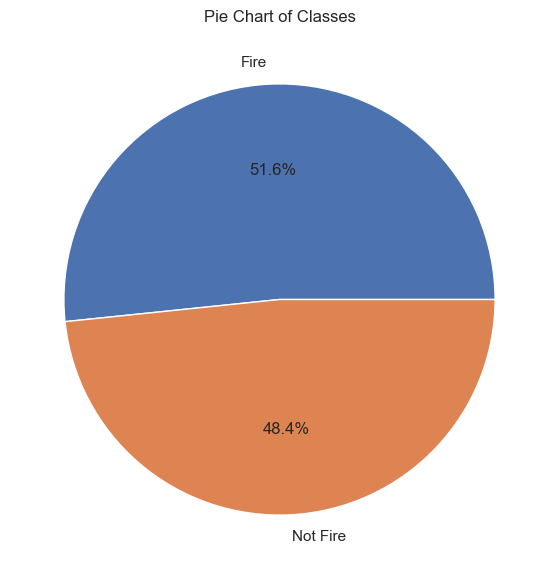

In [48]:
# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

## Correlation

In [49]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367,0.497810,NaN
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067,-0.377328,NaN
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637,-0.121408,NaN
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914,-0.334392,NaN
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553,0.743637,NaN
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759,0.616951,NaN
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911,0.588464,NaN
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062,0.831796,NaN
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417,0.612576,NaN
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000,0.759758,NaN


In [50]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'not fire   '

<Axes: ylabel='FWI'>

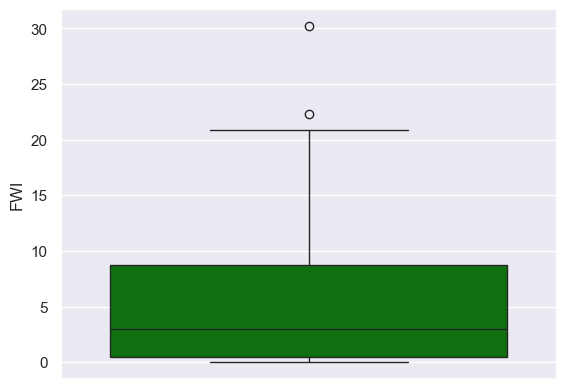

In [51]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

In [52]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1.0


In [53]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

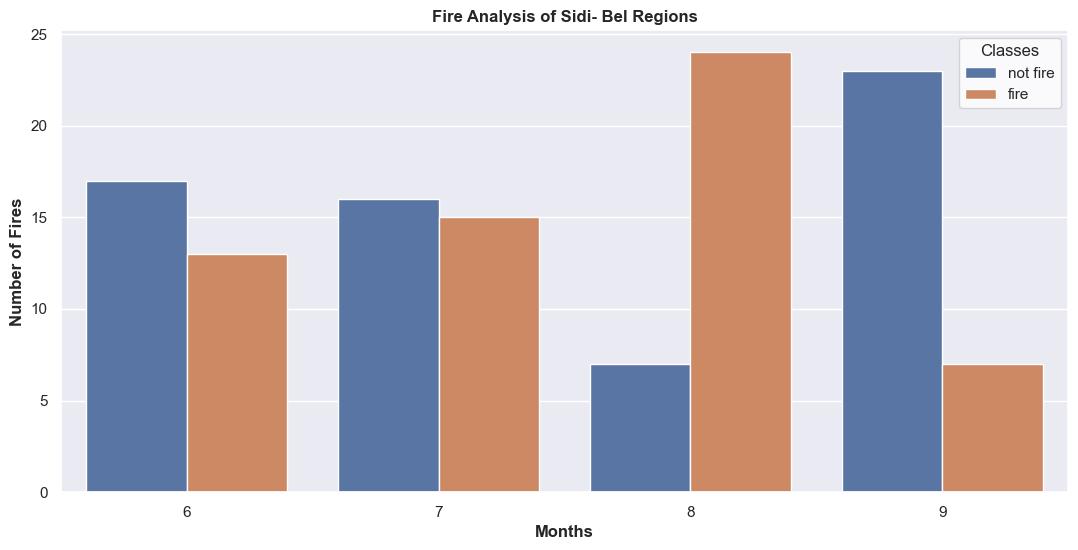

In [54]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

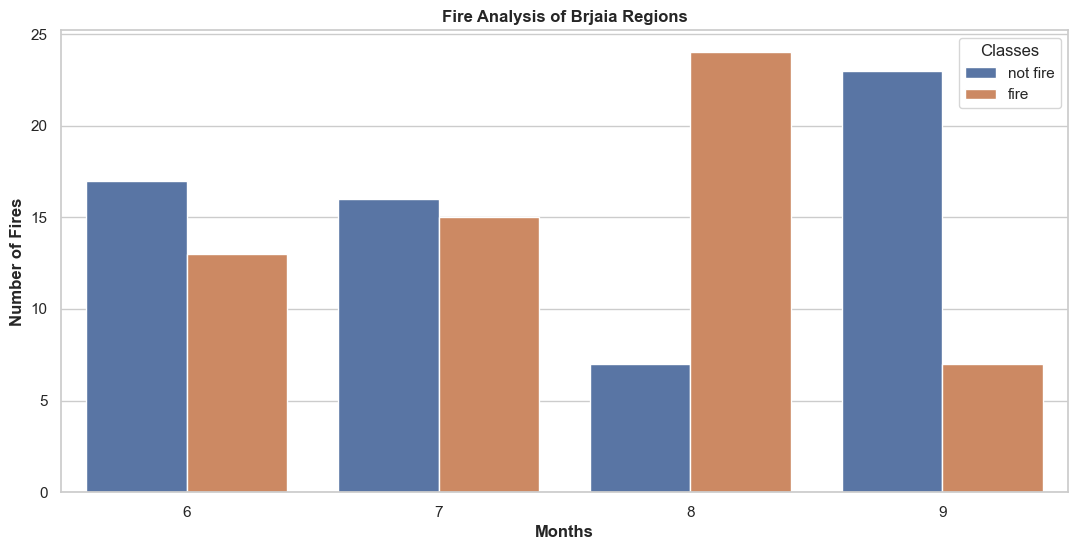

In [55]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September